# 0.0 Setup

## 0.1 Imports

In [69]:
import pandas as pd
import os
from pathlib import Path

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 0.2 Path

In [21]:
path_raw = Path.cwd().parent
file_path = os.path.join(os.path.join(os.path.join(path_raw, 'data'), 'raw'), 'supermarket_sales.csv')

## 0.3 Get Data

In [22]:
data = pd.read_csv(file_path)

# 1.0 Understand Data

In [48]:
df1 = data.copy()

## 1.1 Dimensões e tipo de dado

In [49]:
print(f"Nº columns: {df1.shape[1]}\nNº Rows: {df1.shape[0]}")

Nº columns: 17
Nº Rows: 1000


## 1.2 Missing Data

In [50]:
df1.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## 1.3 Rename columns

In [44]:
list_new_cols = list()
for i in list(df1.columns):
    x = '_'.join(i.split()).upper()
    list_new_cols.append(x)

In [54]:
list_new_cols = ['_'.join(i.split()).upper() for i in list(df1.columns)]

In [55]:
df1.columns = list_new_cols

## Type data

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INVOICE_ID               1000 non-null   object 
 1   BRANCH                   1000 non-null   object 
 2   CITY                     1000 non-null   object 
 3   CUSTOMER_TYPE            1000 non-null   object 
 4   GENDER                   1000 non-null   object 
 5   PRODUCT_LINE             1000 non-null   object 
 6   UNIT_PRICE               1000 non-null   float64
 7   QUANTITY                 1000 non-null   int64  
 8   TAX_5%                   1000 non-null   float64
 9   TOTAL                    1000 non-null   float64
 10  DATE                     1000 non-null   object 
 11  TIME                     1000 non-null   object 
 12  PAYMENT                  1000 non-null   object 
 13  COGS                     1000 non-null   float64
 14  GROSS_MARGIN_PERCENTAGE  

## 2.0 EDA (Exploratory Data Analysis)

In [59]:
df2 = df1.copy()

## 2.1 Univariate Analysis

1. Quantas cidades estão localizado os supermercados?

In [62]:
df2['CITY'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

2. Estamos inseridos em quantas regiões?

In [61]:
df2['BRANCH'].unique()

array(['A', 'C', 'B'], dtype=object)

In [63]:
df2.filter(['CITY','BRANCH']).drop_duplicates()

,CITY,BRANCH
0,Yangon,A
1,Naypyitaw,C
9,Mandalay,B


* Distribuição de preço unitário

In [64]:
df2['UNIT_PRICE'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: UNIT_PRICE, dtype: float64

<AxesSubplot:xlabel='UNIT_PRICE', ylabel='Count'>

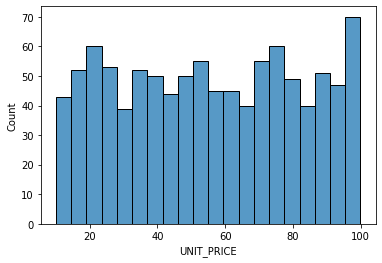

In [68]:
sns.histplot(df2['UNIT_PRICE'],bins=20)

* Quantidade de itens vendidos numa mesma transação

<AxesSubplot:xlabel='QUANTITY', ylabel='Count'>

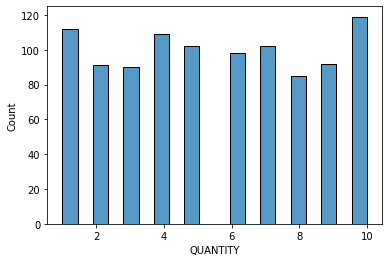

In [70]:
sns.histplot(df2['QUANTITY'],bins=20)


In [71]:
df2.columns

Index(['INVOICE_ID', 'BRANCH', 'CITY', 'CUSTOMER_TYPE', 'GENDER',
       'PRODUCT_LINE', 'UNIT_PRICE', 'QUANTITY', 'TAX_5%', 'TOTAL', 'DATE',
       'TIME', 'PAYMENT', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME',
       'RATING'],
      dtype='object')

In [79]:
for i in range(4):
    print(i)

0
1
2
3


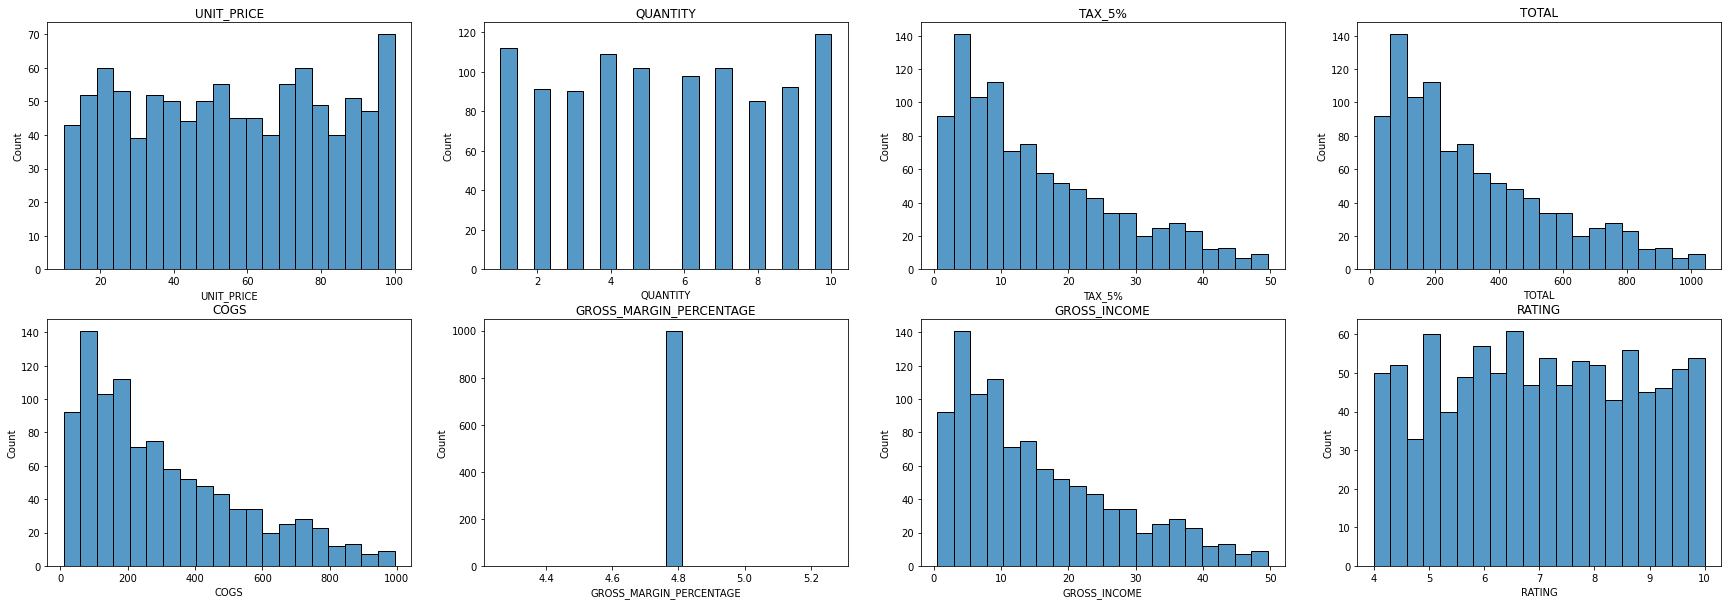

In [83]:
cols_select = ['UNIT_PRICE', 'QUANTITY', 'TAX_5%', 'TOTAL', 'COGS', 'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME','RATING']
plt.figure(figsize=[30,10])

n_cols=4
n_rows = 2
for i in range(len(cols_select)):
    plt.subplot(n_rows,n_cols, i+1)
    name_col = cols_select[i]
    sns.histplot(df2[name_col],bins=20)
    plt.title(name_col)


## 2.2 Bivariate Analysis

## 2.3 Multivariate Analysis

,INVOICE_ID,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,DATE,TIME,PAYMENT,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
